# Introduction

For our project we have decided to dive deep into the issue of climate change and the rise in pollution levels over the past decade. Our generation is already dealing with the negative effects of climate change and it is something that will be an issue that we must deal with for most likely the rest of our lives. While we are aware of how prevalent the climate change issue is in our world, we want to analyze how much climate change has actually become an issue, specifically in New York state where we are both currently students of Cornell University. These issues are ones that weigh heavily on many of our consciences and is something that affects our everyday decisions. In our analysis we want to see if over the years, as pollution levels rise and climate change becomes more rampant, are people making more sustainable choices to fight this reality. We will look at recycling rates and bike usage to quantify these sustainable efforts to help fight the climate change that is occuring. While we know these small individual actions will not completely save the planet, we want to see if there is positive change occuring in our society to fight against our current reality in whatever ways an individual can because small changes can lead to big movements.

For our data sources we use a dataset to examine the pollution levels in New York called, ghgp_data_by_year.csv which shows pollution levels across New  York organized by cities, industry sectors, and total emissions by year. The other dataset we have includes recycling rates in New York City where pollution is a major concern which is called recycling-diversion-and-capture-rates.csv which gives us the date, the borough, the recycling diversion rate, and the recycling capture rate for the years of 2010 and 2016. The other datasets we have include bike usage by Citi Bike in New York City. Here we have the date, the borough, and the bike’s usage information such as the birth year, gender, and type of user, and the time duration of the bike rental. For our overall research question, we are interested in how an increase in pollution levels over the last couple decades have affected public sentiment towards environmental activism and sustainable practices. We are interested in better understanding the relationship between climate change throughout the years and sentiment towards environmental activism and sustainable practices such as recycling and bike usage. 

# Data Description

### Pollution dataset
For the dataset on greenhouse gas emissions, each observation is of a facility that emits greenhouse gases. The majority of the facilities include power plants and chemical production centers. The attributes for each of these observations include FRS ID, facility name, city, state, zip code, address, county, latitude, longitude, NAICS code, industry subparts, industry sector, and emission for the years 2011 through 2018.  This dataset was created by the Environmental Protection Agency (EPA) in order to monitor greenhouse gas emissions for specific facilities across industries over time. Since the EPA sets environmental regulations, this data was likely collected in order to better understand how much pollution certain facilities contribute to the environment in order to determine a plan for regulating these industries. Given this, each facility likely provides the EPA with this data and is aware of the data collection that is occurring. The raw data can be found on our github page under the csv file that is named ghgp_data_by_year or our cleaned dataset version called ghg_data_ny.

### Recycling dataset
For the dataset on recycling rates in New York City, we have divided the data set into two dividing by the two years present in the dataset including 2010 and 2016. The attributes for this dataset include Zone, District, Fiscal Month Number, Fiscal Year, Month Name, Diversion Rate, and Capture Rate. This dataset was created by 
The raw data can be found on our github page under the csv file that is named recycling-diversion-and-capture-rates or our cleaned dataset versions called recycling_2010 and recycling_2016.

### Biking dataset
For the dataset on bike usage in New York City, we got our dataset from Citi Bike which has data on bike usage for every month and year since 2013. We have chosen to examine two datasets for the years of 2013 and 2016 to most closely resemble the years for the recycling datasets. The attributes for this dataset include Zone, Start Station Latitude, Start Station Longitude, tripduration, starttime, stoptime, start station id, end station id, end station name, end station latitude, end station longitude, bikeid, usertype, birthyear, and gender . The raw data can be found on our github page under the csv file that is named 201306-citibike-tripdata.csv and 201606-citibike-tripdata.csv or our cleaned samples of the dataset called biking_2013.csv and biking_2016.csv

# Pre-Registration Statement

For our two analyses we would like to understand how both individuals and local government have been able to carry out and influence sustainable human actions and behaviors over time as pollution levels change. Using our first two datasets, the goal of our first hypothesis test is to understand if a higher percentage of waste is being recycled in New York City over time across multiple districts. By comparing this against our dataset that maps pollution levels for NYC and another for the whole country, we are interested in whether the trends in recycling match that of pollution levels.  We will use a linear regression model with our x input being the pollution levels and seeing if there is a positive correlation with the y output of recycling. We would like to do a similar analysis with the biking and use a linear regression model with our x input in this case also being pollution levels, but this time comparing that with our y output of bike usage and see if there is a positive correlation. This is an appropriate method to address our research question because we want to see if people’s knowledge of a rise in pollution levels (the x variable) affect people’s participation in sustainable practices (recycling and bike usage as the y variables).

For our second hypothesis test, we plan on using Citi bike data from NYC since biking is more sustainable than other forms of transportation. We are interested in seeing how pollution levels might correlate with higher uses of the bikes, greater construction of bike routes on the part of the government, and if there are certain correlations between the location of where bike routes are established and the sustainable behaviors of the people. We plan on creating a multivariable Linear Regression model where we will group by the 5 boroughs of NYC and use measures of recycling such as the diversion rate (the percent of total waste that is recycled) and capture rate (the total recyclable waste that is sent to be recycled) as our X inputs to predict the number of bike routes in each area, the Y input. For this model, we’ll also have to create a new dataframe where we join the recycling data and the biking data. This model is appropriate because it will help us see if there is a correlation between how much people are biking and how much they are recycling to understand if people are engaging in environmentally sustainable behaviors. This will help us address our research question as it will help explain the sentiment towards environmental activism and how it varies between the NYC boroughs so that we can provide more context for our previous model which directly compares pollution levels to environmental activism. 

These two tests will hopefully help us understand if government actions like constructing bike routes might be driving responses (which might lead to higher Citi bike use) to rising pollution levels or if individuals are taking action of their own and are becoming more environmentally conscious (this can be inferred from the recycling data analysis) as they become aware of increasing pollution levels. 

# Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import poisson, ttest_ind

First we will analyze our pollution dataset and see how much pollution levels have risen over the past few years in New York.

In [5]:
ghg_ny = pd.read_csv('ghg_ny.csv')
ghg_ny.head()

,Unnamed: 0,facility_id,frs_id,facility_name,city,state,zip_code,address,county,latitude,...,industy_subparts,industry_sector,2018,2017,2016,2015,2014,2013,2012,2011
0,0,1000077,110000774797,REPUBLIC STEEL LACKAWANNA,BLASDELL,NY,14219,S3049 LAKESHORE RD.,ERIE COUNTY,42.80,...,C,Metals,78801.40,76235.01,61447.47,73193.02,77355.81,71702.38,80619.20,72355.73
1,1,1000093,110000324435,Momentive Performance Materials,WATERFORD,NY,12188,260 HUDSON RIVER ROAD,Saratoga,42.82,...,CTT,OtherWaste,134663.45,131363.56,125491.33,126818.78,127808.87,132095.46,120944.74,142529.89
2,2,1000101,110019468057,Athens Generating Company,ATHENS,NY,12015,9300 U S HIGHWAY 9W,Greene,42.27,...,D,Power Plants,1381328.03,1487213.14,1514867.54,1285191.24,1026373.20,1376177.50,2133936.99,1566947.61
3,3,1000108,110012158707,North 1st,BROOKLYN,NY,11211,NORTH 1ST & 47-79 RIVER ST,Kings,40.72,...,CD,Power Plants,31069.94,22460.32,26369.45,18559.93,20816.32,26629.45,26775.50,45473.83
4,4,1000111,110012158734,Vernon Boulevard,LONG ISLAND CITY,NY,11427,42 30 VERNON BLVD,Queens,40.75,...,CD,Power Plants,35221.82,28073.30,28262.00,27000.90,26232.55,43133.84,38257.51,44820.68


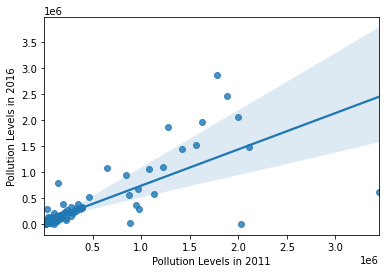

In [6]:
sns.regplot(x="2011", y="2016", data=ghg_ny)
plt.xlabel("Pollution Levels in 2011")
plt.ylabel("Pollution Levels in 2016")
plt.show()

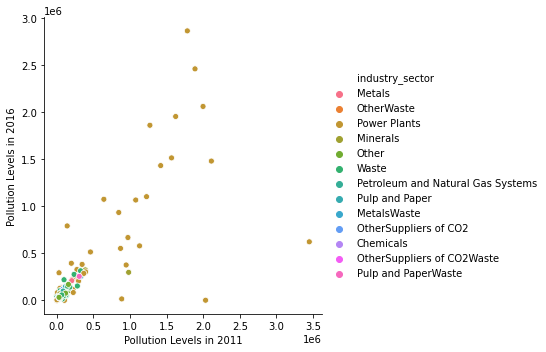

In [7]:
sns.relplot(x="2011", y="2016", hue="industry_sector", data=ghg_ny)
plt.xlabel("Pollution Levels in 2011")
plt.ylabel("Pollution Levels in 2016")
plt.show()

In [8]:
ghg_ny["industry_sector"].value_counts()

Power Plants                         76
Waste                                36
Other                                32
Minerals                              9
Petroleum and Natural Gas Systems     7
Metals                                6
Pulp and Paper                        5
OtherSuppliers of CO2                 2
Chemicals                             2
MetalsWaste                           1
Pulp and PaperWaste                   1
OtherSuppliers of CO2Waste            1
OtherWaste                            1
Name: industry_sector, dtype: int64

In [9]:
## initialize a KMeans object
clustering = KMeans(n_clusters = 3, random_state = 15)

## perform the KMeans algorithm on the penguins_clean bill and flipper length data
clustering.fit(ghg_ny[["2011", "2018"]])

##finding the cluster centers
clustering.cluster_centers_

array([[  87235.63477987,   81408.68408805],
       [1961293.7075    , 1737516.9175    ],
       [1085828.21666667,  620179.6375    ]])

In [10]:
ghg_ny.describe()

,Unnamed: 0,facility_id,frs_id,zip_code,latitude,longitude,naics_code,2018,2017,2016,2015,2014,2013,2012,2011
count,179.000000,1.790000e+02,1.790000e+02,179.000000,179.000000,179.000000,179.000000,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02
mean,89.000000,1.003555e+06,1.100140e+11,12451.111732,42.093296,-75.122123,375564.335196,1.915434e+05,1.777880e+05,2.070736e+05,2.232306e+05,2.233996e+05,2.193868e+05,2.355143e+05,2.379372e+05
std,51.816986,2.837565e+03,1.773127e+07,1431.822975,1.196583,1.883042,169157.430534,4.008765e+05,3.672045e+05,4.352217e+05,4.522830e+05,4.422304e+05,4.238308e+05,4.724936e+05,4.838693e+05
min,0.000000,1.000077e+06,1.100003e+11,10009.000000,40.560000,-79.350000,221112.000000,3.240500e+02,1.090000e+01,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.810000e+01
25%,44.500000,1.001194e+06,1.100008e+11,11235.500000,40.810000,-76.490000,221112.000000,3.103041e+04,2.838040e+04,3.090339e+04,3.199285e+04,3.056397e+04,3.260268e+04,3.516281e+04,3.573856e+04
50%,89.000000,1.002843e+06,1.100072e+11,12188.000000,42.290000,-74.000000,325211.000000,6.236400e+04,5.526479e+04,6.144747e+04,6.907765e+04,7.016813e+04,6.718341e+04,6.539170e+04,6.747830e+04
75%,133.500000,1.005860e+06,1.100197e+11,13665.500000,43.035000,-73.775000,562212.000000,1.252133e+05,1.330378e+05,1.397206e+05,1.507080e+05,1.535405e+05,1.470076e+05,1.479933e+05,1.519051e+05
max,178.000000,1.011742e+06,1.100701e+11,14903.000000,44.990000,-72.870000,928110.000000,2.584176e+06,2.311840e+06,2.865681e+06,2.643762e+06,2.570292e+06,2.274036e+06,2.585287e+06,3.449007e+06


In [11]:
cluster_labels = clustering.labels_
cluster_labels[0:5]
ghg_ny['cluster_label'] = cluster_labels
ghg_ny.head()

,Unnamed: 0,facility_id,frs_id,facility_name,city,state,zip_code,address,county,latitude,...,industry_sector,2018,2017,2016,2015,2014,2013,2012,2011,cluster_label
0,0,1000077,110000774797,REPUBLIC STEEL LACKAWANNA,BLASDELL,NY,14219,S3049 LAKESHORE RD.,ERIE COUNTY,42.80,...,Metals,78801.40,76235.01,61447.47,73193.02,77355.81,71702.38,80619.20,72355.73,0
1,1,1000093,110000324435,Momentive Performance Materials,WATERFORD,NY,12188,260 HUDSON RIVER ROAD,Saratoga,42.82,...,OtherWaste,134663.45,131363.56,125491.33,126818.78,127808.87,132095.46,120944.74,142529.89,0
2,2,1000101,110019468057,Athens Generating Company,ATHENS,NY,12015,9300 U S HIGHWAY 9W,Greene,42.27,...,Power Plants,1381328.03,1487213.14,1514867.54,1285191.24,1026373.20,1376177.50,2133936.99,1566947.61,1
3,3,1000108,110012158707,North 1st,BROOKLYN,NY,11211,NORTH 1ST & 47-79 RIVER ST,Kings,40.72,...,Power Plants,31069.94,22460.32,26369.45,18559.93,20816.32,26629.45,26775.50,45473.83,0
4,4,1000111,110012158734,Vernon Boulevard,LONG ISLAND CITY,NY,11427,42 30 VERNON BLVD,Queens,40.75,...,Power Plants,35221.82,28073.30,28262.00,27000.90,26232.55,43133.84,38257.51,44820.68,0


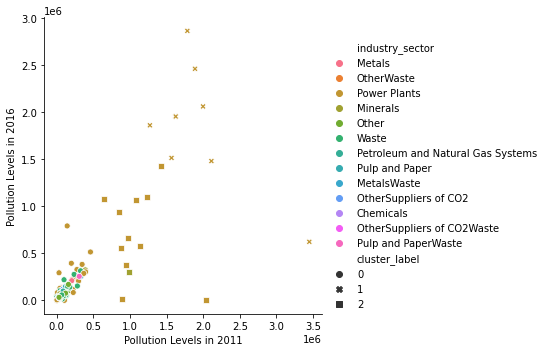

In [12]:
sns.relplot(x="2011", y="2016", hue="industry_sector", style="cluster_label", data=ghg_ny)
plt.xlabel("Pollution Levels in 2011")
plt.ylabel("Pollution Levels in 2016")
plt.show()

In [13]:
top_pollutors = pd.DataFrame()
top_pollutors["counts_2012"] = ghg_ny.groupby("city")["2012"].sum().nlargest(3)
top_pollutors["counts_2011"] = ghg_ny.groupby("city")["2011"].sum()
top_pollutors["counts_2013"] = ghg_ny.groupby("city")["2013"].sum()
top_pollutors["counts_2014"] = ghg_ny.groupby("city")["2014"].sum()
top_pollutors["counts_2015"] = ghg_ny.groupby("city")["2015"].sum()
top_pollutors["counts_2016"] = ghg_ny.groupby("city")["2016"].sum()
top_pollutors["counts_2017"] = ghg_ny.groupby("city")["2017"].sum()
top_pollutors["counts_2018"] = ghg_ny.groupby("city")["2018"].sum()
top_pollutors.head()

,counts_2012,counts_2011,counts_2013,counts_2014,counts_2015,counts_2016,counts_2017,counts_2018
city,,,,,,,,
ASTORIA,4764387.02,4042716.00,4380823.02,4675385.27,4466886.67,4155855.99,3778604.39,4217072.28
NEW YORK,2622599.36,2735569.11,2803733.68,2662647.29,2675021.50,2643367.57,2610288.32,2682403.80
OSWEGO,2422483.93,1500633.06,2346473.42,2683641.65,2847435.29,2086964.18,1941340.78,2319907.68


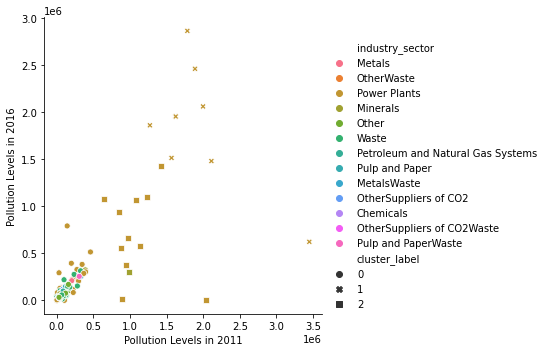

In [41]:
sns.relplot(x="2011", y="2016", hue="industry_sector", style="cluster_label", data=ghg_ny)
plt.xlabel("Pollution Levels in 2011")
plt.ylabel("Pollution Levels in 2016")
plt.show()

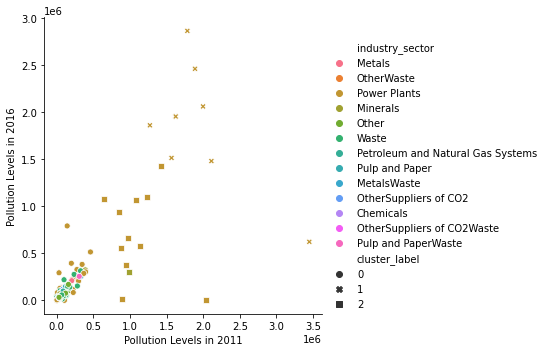

,counts_2012,counts_2011,counts_2013,counts_2014,counts_2015,counts_2016,counts_2017,counts_2018
city,,,,,,,,
ASTORIA,4764387.02,4042716.00,4380823.02,4675385.27,4466886.67,4155855.99,3778604.39,4217072.28
NEW YORK,2622599.36,2735569.11,2803733.68,2662647.29,2675021.50,2643367.57,2610288.32,2682403.80
OSWEGO,2422483.93,1500633.06,2346473.42,2683641.65,2847435.29,2086964.18,1941340.78,2319907.68


In [42]:
sns.relplot(x="2011", y="2016", hue="industry_sector", style="cluster_label", data=ghg_ny)
plt.xlabel("Pollution Levels in 2011")
plt.ylabel("Pollution Levels in 2016")
plt.show()
top_pollutors = pd.DataFrame()
top_pollutors["counts_2012"] = ghg_ny.groupby("city")["2012"].sum().nlargest(3)
top_pollutors["counts_2011"] = ghg_ny.groupby("city")["2011"].sum()
top_pollutors["counts_2013"] = ghg_ny.groupby("city")["2013"].sum()
top_pollutors["counts_2014"] = ghg_ny.groupby("city")["2014"].sum()
top_pollutors["counts_2015"] = ghg_ny.groupby("city")["2015"].sum()
top_pollutors["counts_2016"] = ghg_ny.groupby("city")["2016"].sum()
top_pollutors["counts_2017"] = ghg_ny.groupby("city")["2017"].sum()
top_pollutors["counts_2018"] = ghg_ny.groupby("city")["2018"].sum()
top_pollutors.head()

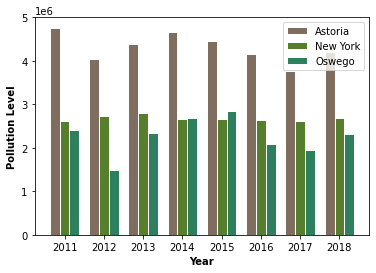

In [43]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = top_pollutors.iloc[0]
bars2 = top_pollutors.iloc[1]
bars3 = top_pollutors.iloc[2]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Astoria')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='New York')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Oswego')
 
# Add xticks on the middle of the group bars
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Pollution Level', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [14]:
recycling_2010 = pd.read_csv('recycling_2010.csv')
recycling_2010.head()

,Unnamed: 0,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate,Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate
0,0,Manhattan,MN01,11,2010,May,29.3,54.4,70.2,58.2
1,1,Manhattan,MN02,11,2010,May,26.5,44.3,79.0,52.7
2,2,Manhattan,MN03,11,2010,May,13.1,47.5,39.5,44.0
3,3,Manhattan,MN04,11,2010,May,23.1,37.4,73.0,45.9
4,4,Manhattan,MN05,11,2010,May,23.8,41.1,66.6,47.3


In [15]:
recycling_2016 = pd.read_csv('recycling_2016.csv')
recycling_2016.head()

,Unnamed: 0,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate,Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate
0,59,Brooklyn,BKN01,1,2016,July,14.7,44.0,43.2,43.6
1,60,Brooklyn,BKN02,1,2016,July,16.5,30.2,49.8,36.0
2,61,Brooklyn,BKN03,1,2016,July,10.1,29.0,32.8,30.8
3,62,Brooklyn,BKN04,1,2016,July,12.4,30.6,46.4,37.8
4,63,Brooklyn,BKN05,1,2016,July,9.1,23.5,33.0,27.9


In [18]:
biking_2013 = pd.read_csv('biking_2013.csv')
biking_2013.head()

,Unnamed: 0,Zone,start station latitude,start station longitude,index,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,8,1.0,40.72,-73.98,416821,663,2013-06-25 08:23:45,2013-06-25 08:34:48,393,E 5 St & Avenue C,293.0,Lafayette St & E 8 St,40.730207,-73.991026,16733,Subscriber,1957.0,2
1,16,1.0,40.72,-73.98,305402,1452,2013-06-21 07:00:30,2013-06-21 07:24:42,349,Rivington St & Ridge St,522.0,E 51 St & Lexington Ave,40.757148,-73.972078,19616,Subscriber,1987.0,2
2,24,1.0,40.72,-73.98,525696,719,2013-06-29 09:27:43,2013-06-29 09:39:42,349,Rivington St & Ridge St,369.0,Washington Pl & 6 Ave,40.732241,-74.000264,17302,Subscriber,1982.0,1
3,32,1.0,40.72,-73.98,290404,561,2013-06-20 16:08:52,2013-06-20 16:18:13,411,E 6 St & Avenue D,502.0,Henry St & Grand St,40.714215,-73.981346,17235,Subscriber,1964.0,2
4,40,1.0,40.72,-73.98,473951,943,2013-06-27 08:18:32,2013-06-27 08:34:15,317,E 6 St & Avenue B,442.0,W 27 St & 7 Ave,40.746647,-73.993915,17940,Subscriber,1984.0,1


In [19]:
biking_2016 = pd.read_csv('biking_2016.csv')
biking_2016.head()

,Unnamed: 0,Zone,start station latitude,start station longitude,index,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,0,3.0,40.71,-73.94,900435,160,6/20/2016 06:22:53,6/20/2016 06:25:33,3070,McKibbin St & Manhattan Ave,3071,Boerum St & Broadway,40.705381,-73.949765,17226,Subscriber,1952.0,1
1,2,3.0,40.71,-73.94,750686,1474,6/17/2016 00:03:24,6/17/2016 00:27:59,3074,Montrose Ave & Bushwick Ave,3129,Queens Plaza North & Crescent St,40.751102,-73.940737,25447,Subscriber,1991.0,1
2,4,3.0,40.71,-73.94,747914,634,6/16/2016 21:44:55,6/16/2016 21:55:30,3081,Graham Ave & Grand St,3068,Humboldt St & Varet St,40.703172,-73.940636,19282,Subscriber,1981.0,1
3,6,1.0,40.72,-73.98,895781,1249,6/19/2016 21:02:22,6/19/2016 21:23:11,411,E 6 St & Avenue D,446,W 24 St & 7 Ave,40.744876,-73.995299,20052,Subscriber,1980.0,1
4,14,1.0,40.72,-73.98,1022077,443,6/22/2016 11:02:31,6/22/2016 11:09:55,150,E 2 St & Avenue C,293,Lafayette St & E 8 St,40.730287,-73.990765,18622,Subscriber,1991.0,1


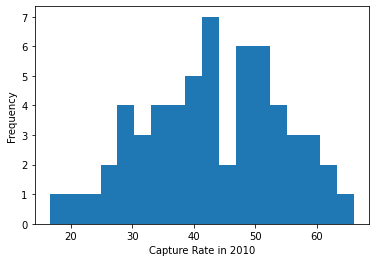

In [20]:
##Histogram for 2010
plt.hist(recycling_2010["Capture Rate"], bins=18)
plt.xlabel("Capture Rate in 2010")
plt.ylabel("Frequency")
plt.show()

In [21]:
## Average Capture Rate for 2010
mean_2010 = round(recycling_2010[["Capture Rate"]].mean(),2)
draws_2010 = np.random.poisson(mean_2010, 1000)

In [22]:
print("Mean Capture Rate for 2010: ", mean_2010)

Mean Capture Rate for 2010:  Capture Rate    43.22
dtype: float64


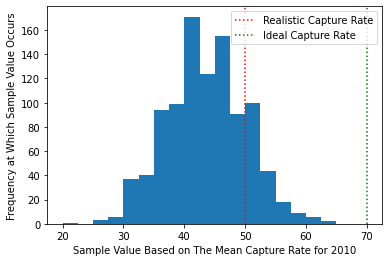

In [23]:
## Histogram for draws_2010
plt.hist(draws_2010, bins=18)
plt.xlabel("Sample Value Based on The Mean Capture Rate for 2010")
plt.ylabel("Frequency at Which Sample Value Occurs")
plt.axvline(color='r', linestyle="dotted", x=50, label="Realistic Capture Rate")
plt.axvline(color='g', linestyle="dotted", x=70, label="Ideal Capture Rate")
plt.legend(loc="upper right")
plt.show()

In [24]:
## Probability of Capturing 50% in 2010
rate50_2010 = round(float(poisson.sf(50, mean_2010)*100),4)
print("probability of capturing more than 50% of recycled waste: "+ str(rate50_2010)+"%")

probability of capturing more than 50% of recycled waste: 13.501%


In [25]:
## Probability of Capturing 70% in 2010
rate70_2010 = round(float(poisson.sf(70, mean_2010)*100),4)
print("probability of capturing more than 70% of recycled waste: "+ str(rate70_2010)+"%")

probability of capturing more than 70% of recycled waste: 0.0066%


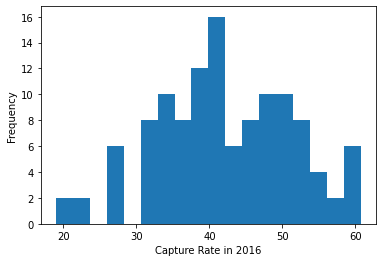

In [26]:
##Histogram for 2016
plt.hist(recycling_2016["Capture Rate"], bins=18)
plt.xlabel("Capture Rate in 2016")
plt.ylabel("Frequency")
plt.show()

In [27]:
## Average Capture Rate for 2016
mean_2016 = round(recycling_2016[["Capture Rate"]].mean(),2)
draws_2016 = np.random.poisson(mean_2016, 1000)

In [28]:
print("Mean Capture Rate for 2016: ", mean_2016)

Mean Capture Rate for 2016:  Capture Rate    42.02
dtype: float64


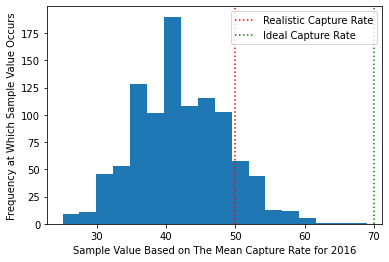

In [29]:
## Histogram for draws_2016
plt.hist(draws_2016, bins=18)
plt.xlabel("Sample Value Based on The Mean Capture Rate for 2016")
plt.ylabel("Frequency at Which Sample Value Occurs")
plt.axvline(color='r', linestyle="dotted", x=50, label="Realistic Capture Rate")
plt.axvline(color='g', linestyle="dotted", x=70, label="Ideal Capture Rate")
plt.legend(loc="upper right")
plt.show()

In [30]:
## Probability of Capturing 50% in 2016
rate50_2016 = round(float(poisson.sf(50, mean_2016)*100),4)
print("probability of capturing more than 50% of recycled waste: "+ str(rate50_2016)+"%")

probability of capturing more than 50% of recycled waste: 9.8094%


In [31]:
## Probability of Capturing 70% in 2016
rate70_2016 = round(float(poisson.sf(70, mean_2016)*100),4)
print("probability of capturing more than 70% of recycled waste: "+ str(rate70_2016)+"%")

probability of capturing more than 70% of recycled waste: 0.0029%


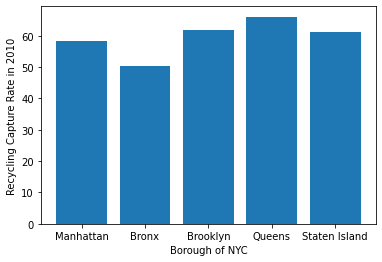

In [32]:
plt.bar(recycling_2010["Zone"], recycling_2010["Capture Rate"])
plt.xlabel('Borough of NYC')
plt.ylabel('Recycling Capture Rate in 2010')
plt.show()

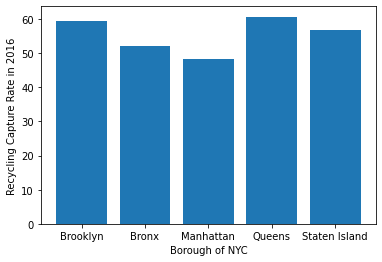

In [33]:
plt.bar(recycling_2016["Zone"], recycling_2016["Capture Rate"])
plt.xlabel('Borough of NYC')
plt.ylabel('Recycling Capture Rate in 2016')
plt.show()

In [34]:
boro_counts_2013 = pd.DataFrame(biking_2013["Zone"].value_counts())
boro_counts_2013 = boro_counts_2013.rename(columns={"Zone":"boro_counts"})
boro_counts_2013["Zone"] = ["Manhattan", "Brooklyn"]
boro_counts_2013.head()

,boro_counts,Zone
1.0,706,Manhattan
3.0,91,Brooklyn


In [35]:
boro_counts_2016 = pd.DataFrame(biking_2016["Zone"].value_counts())
boro_counts_2016 = boro_counts_2016.rename(columns={"Zone":"boro_counts"})
boro_counts_2016["Zone"] = ["Manhattan", "Brooklyn","Queens"]
boro_counts_2016.head()

,boro_counts,Zone
1.0,740,Manhattan
3.0,73,Brooklyn
4.0,16,Queens


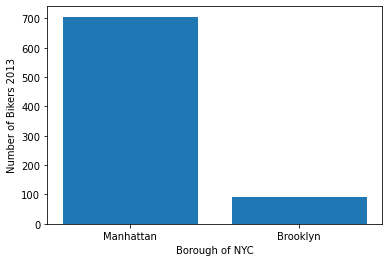

In [36]:
plt.bar(boro_counts_2013["Zone"], boro_counts_2013["boro_counts"])
plt.xlabel('Borough of NYC')
plt.ylabel('Number of Bikers 2013')
plt.show()

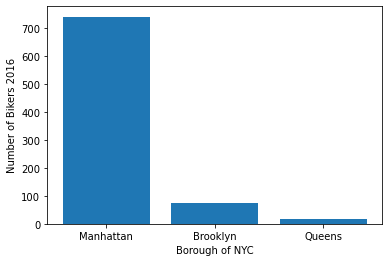

In [37]:
plt.bar(boro_counts_2016["Zone"], boro_counts_2016["boro_counts"])
plt.xlabel('Borough of NYC')
plt.ylabel('Number of Bikers 2016')
plt.show()

In [38]:
year = 2013
total_sums = np.zeros(6)
for i in range(6):
    year_str = str(year)
    total_sums[i] = ghg_ny[year_str].sum()
    year = year+1
total_sums = pd.DataFrame(total_sums)
total_sums["total_pollution"] = total_sums
total_sums["Year"] = ["2013", "2014", "2015", "2016", "2017", "2018"]
total_sums = total_sums[["Year", "total_pollution"]]
total_sums["biker_counts"] = [618572, 1035478, 941117, 1460303, 1731155, 1952950]
print("The sum of pollution levels for each year from 2011-2018: ")
total_sums.head()

The sum of pollution levels for each year from 2011-2018: 


,Year,total_pollution,biker_counts
0,2013,39270240.62,618572
1,2014,39988530.62,1035478
2,2015,39958269.61,941117
3,2016,37066181.97,1460303
4,2017,31824056.02,1731155


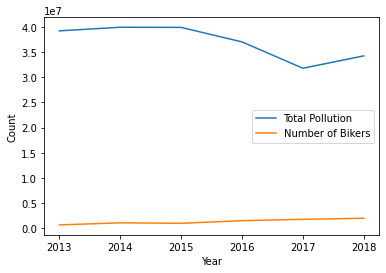

In [39]:
plt.plot(total_sums['Year'], total_sums["total_pollution"], label="Total Pollution")
plt.plot(total_sums['Year'], total_sums["biker_counts"], label="Number of Bikers")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.show()

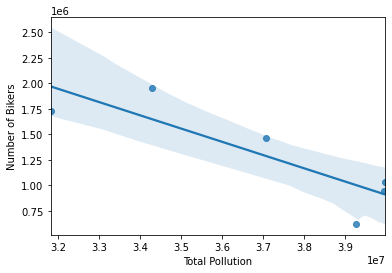

In [40]:
sns.regplot(x='total_pollution', y="biker_counts", data=total_sums)
plt.xlabel("Total Pollution")
plt.ylabel("Number of Bikers")
plt.show()

# Evaluation of Significance

In [44]:
## Find the standard deviation for 2010 and 2016
std_2010 = recycling_2010[["Capture Rate"]].std()
std_2016 = recycling_2016[["Capture Rate"]].std()

In [45]:
##Create the distributions for 2010 and 2016 
x_2010 = pd.DataFrame(np.random.normal(mean_2010,std_2010, size=1000))
y_2016 = pd.DataFrame(np.random.normal(mean_2016,std_2016, size=1000))
recycling_model = LinearRegression().fit(x_2010,y_2016)
print("the slope is: ", round(float(recycling_model.coef_),4))

the slope is:  -0.0588


In [46]:
stats.ttest_ind(x_2010, y_2016)
print("The p-value is 0.139")
print("The test statistic is 1.477")

The p-value is 0.139
The test statistic is 1.477


In [47]:
pollution_bike_model = LinearRegression().fit(total_sums[['total_pollution']],total_sums[['biker_counts']])
pollution_bike_slope = pollution_bike_model.coef_[0][0]
pollution_bike_intercept = pollution_bike_model.intercept_[0]
pollution_bike_corr = pollution_bike_model.score(total_sums[['total_pollution']],total_sums[['biker_counts']])
print("The slope for total pollution levels in NYC vs. number of Citi bike trips is: {:.3f}".format(pollution_bike_slope))
print("The intercept for total pollution levels in NYC vs. number of Citi bike trips is: {:.3f}".format(pollution_bike_intercept))
print("The r squared value for total pollution levels in NYC vs. number of Citi bike trips is: {:.3f}".format(pollution_bike_corr))

The slope for total pollution levels in NYC vs. number of Citi bike trips is: -0.130
The intercept for total pollution levels in NYC vs. number of Citi bike trips is: 6096814.740
The r squared value for total pollution levels in NYC vs. number of Citi bike trips is: 0.737


In [48]:
train_set, test_set = train_test_split(ghg_ny, test_size = 0.20, random_state = 15)
print ("This is the training set for the NY pollution data: ", train_set)
print ("This is the test set for the NY pollution data: ", test_set)

This is the training set for the NY pollution data:       Unnamed: 0  facility_id        frs_id  \
71           71      1002160  110004541434   
31           31      1000771  110000582398   
138         138      1006042  110007384106   
151         151      1006910  110019768526   
120         120      1004894  110004513571   
..          ...          ...           ...   
156         156      1007087  110001595239   
128         128      1005360  110056973182   
119         119      1004818  110056972307   
133         133      1005849  110043970913   
140         140      1006276  110037939737   

                           facility_name           city state  zip_code  \
71               GUARDIAN INDUSTRIES LLC         GENEVA    NY     14456   
31                             Northport      NORTHPORT    NY     11768   
138        TGP Station 245 West Winfield  WEST WINFIELD    NY     13491   
151        OSWEGO CO ENERGY RECOVERY FAC         Fulton    NY     13069   
120    FULTON COUNT

In [49]:
pollution_model = LinearRegression().fit(train_set[["2011"]],train_set[["2016"]])
pollution_slope = pollution_model.coef_[0][0]
pollution_intercept = pollution_model.intercept_[0]
pollution_corr = pollution_model.score(train_set[["2011"]],train_set[["2016"]])
print("The slope for NY pollution levels in 2011 vs. the pollution levels in 2016: {:.3f}".format(pollution_slope))
print("The intercept for NY pollution levels in 2011 vs. the pollution levels in 2016: {:.3f}".format(pollution_intercept))
print("The r squared for NY pollution levels in 2011 vs. the pollution levels in 2016: {:.3f}".format(pollution_corr))

The slope for NY pollution levels in 2011 vs. the pollution levels in 2016: 0.659
The intercept for NY pollution levels in 2011 vs. the pollution levels in 2016: 46633.421
The r squared for NY pollution levels in 2011 vs. the pollution levels in 2016: 0.563


In [50]:
score_train = pollution_model.score(train_set[['2011']], train_set['2016'])
print("The percent accuracy of the training set is " + "{:.2%}".format(score_train))

The percent accuracy of the training set is 56.27%


In [51]:
score_test = pollution_model.score(test_set[['2011']], test_set['2016'])
print("The percent accuracy of the testing set is " + "{:.2%}".format(score_test))

The percent accuracy of the testing set is 80.29%


In [52]:
industry_lookup = pd.DataFrame({"cluster_label": [0, 1, 2],
                                        "predicted_industry": ["Power Plants", "Waste", "Other"]})
industry_lookup.head()

,cluster_label,predicted_industry
0,0,Power Plants
1,1,Waste
2,2,Other


In [53]:
industry_predict = pd.merge(ghg_ny, industry_lookup, on="cluster_label")
industry_predict.head()

,Unnamed: 0,facility_id,frs_id,facility_name,city,state,zip_code,address,county,latitude,...,2018,2017,2016,2015,2014,2013,2012,2011,cluster_label,predicted_industry
0,0,1000077,110000774797,REPUBLIC STEEL LACKAWANNA,BLASDELL,NY,14219,S3049 LAKESHORE RD.,ERIE COUNTY,42.80,...,78801.40,76235.01,61447.47,73193.02,77355.81,71702.38,80619.20,72355.73,0,Power Plants
1,1,1000093,110000324435,Momentive Performance Materials,WATERFORD,NY,12188,260 HUDSON RIVER ROAD,Saratoga,42.82,...,134663.45,131363.56,125491.33,126818.78,127808.87,132095.46,120944.74,142529.89,0,Power Plants
2,3,1000108,110012158707,North 1st,BROOKLYN,NY,11211,NORTH 1ST & 47-79 RIVER ST,Kings,40.72,...,31069.94,22460.32,26369.45,18559.93,20816.32,26629.45,26775.50,45473.83,0,Power Plants
3,4,1000111,110012158734,Vernon Boulevard,LONG ISLAND CITY,NY,11427,42 30 VERNON BLVD,Queens,40.75,...,35221.82,28073.30,28262.00,27000.90,26232.55,43133.84,38257.51,44820.68,0,Power Plants
4,5,1000112,110019827286,23rd and 3rd,BROOKLYN,NY,11232,730 3rd Avenue,Kings,40.66,...,70705.29,52698.66,66797.35,67399.25,40722.20,102599.22,68984.74,100591.83,0,Power Plants


In [54]:
num_correct = 0
for row in range(len(industry_predict)):
    if (industry_predict.iloc[row]['industry_sector'] == industry_predict.iloc[row]["predicted_industry"]):
        num_correct = num_correct + 1
accuracy = (num_correct/len(industry_predict))
print("The percent accuracy of predicting industry based on 2011 and 2016 pollution levels is: " + "{:.2%}".format(accuracy))

The percent accuracy of predicting industry based on 2011 and 2016 pollution levels is: 31.84%


# Interpretations and Conclusion

# Limitations

For our research question, we are interested in the relationship between climate change throughout the years and sentiment towards environmental activism and sustainable practices in the general public. This dataset, however, shows pollution levels by specific facilities and industries and not the general public. Because the dataset doesn’t reflect the entire population of who we’re trying to analyze, the trends we find might not be generalizable to the entire public and it might be difficult to bring the dataset of greenhouse gas emissions and recycling and bike usage together exactly. Since this data was collected by the EPA likely to regulate emissions, the emissions over time for each observation might be affected by certain EPA regulations. Another limitation includes the fact that the bike and recycling data is only for New York City and so we are not able to generalize our finding to all of New York State.